# Importing required libraries and cleaning data

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import itertools

# Load the dataset
data = pd.read_csv("cardio_train.csv", delimiter=";")
data = data.drop('id', axis = 1)

data['age'] = (data['age']/365).apply(np.floor)

# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df.loc[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df_cleaned

# Apply the remove_outliers function to each numerical column in the dataset
columns_to_clean = ["age", "height", "weight", "ap_hi", "ap_lo"]
for col in columns_to_clean:
    data = remove_outliers(data, col)

data.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,51.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
5,60.0,1,151,67.0,120,80,2,2,0,0,0,0


# Basic EDA(Exploratory Data Analysis) of various features

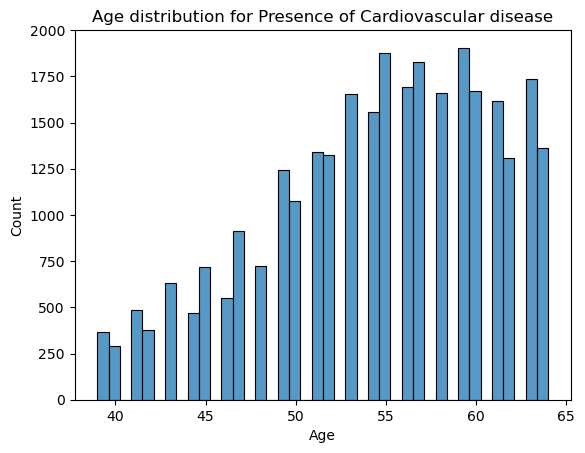

In [31]:
data_target_1 = data[data['cardio'] == 1]

# plot the age distribution using a histogram
sns.histplot(data_target_1['age'], kde=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution for Presence of Cardiovascular disease')
plt.show()

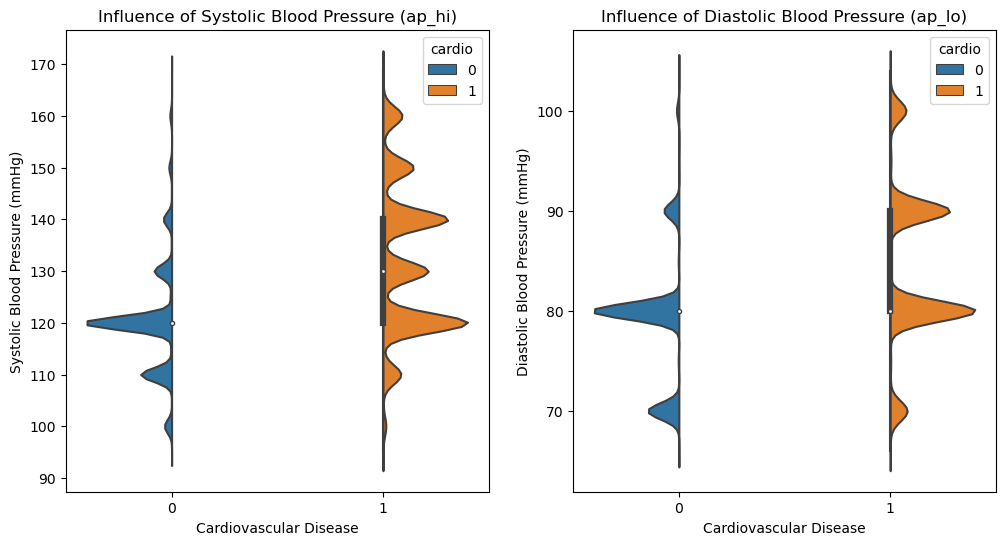

In [52]:
# Create a grid of subplots
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Create a violin plot of ap_hi levels by cardiovascular disease status
sns.violinplot(x='cardio', y='ap_hi', data=data, hue='cardio', split=True, ax=axs[0])
axs[0].set_title('Influence of Systolic Blood Pressure (ap_hi)')
axs[0].set_xlabel('Cardiovascular Disease')
axs[0].set_ylabel('Systolic Blood Pressure (mmHg)')

# Create a violin plot of ap_lo levels by cardiovascular disease status
sns.violinplot(x='cardio', y='ap_lo', data=data, hue='cardio', split=True, ax=axs[1])
axs[1].set_title('Influence of Diastolic Blood Pressure (ap_lo)')
axs[1].set_xlabel('Cardiovascular Disease')
axs[1].set_ylabel('Diastolic Blood Pressure (mmHg)')

plt.show()


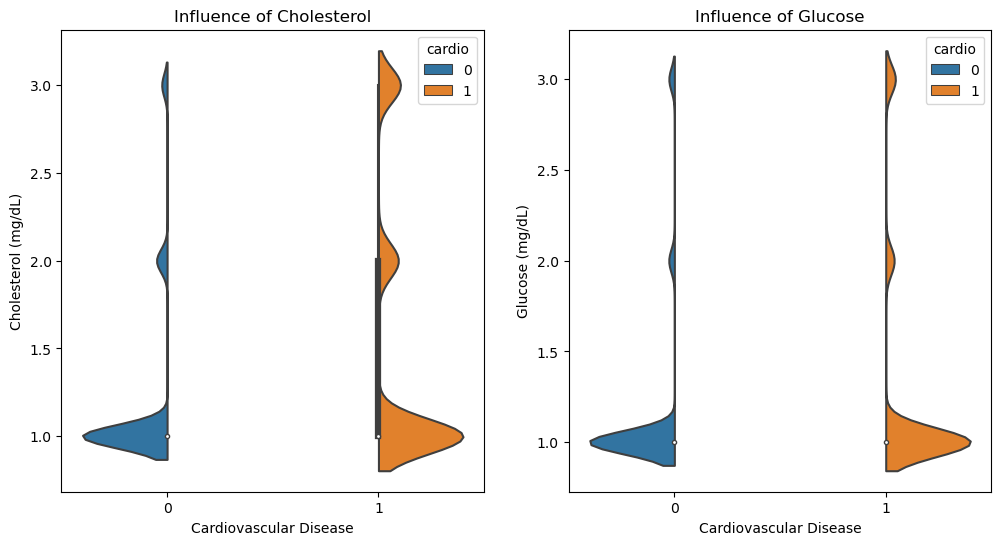

In [49]:
# Create a grid of subplots
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Create a violin plot of cholesterol levels by cardiovascular disease status
sns.violinplot(x='cardio', y='cholesterol', data=data, hue='cardio', split=True, ax=axs[0])
axs[0].set_title('Influence of Cholesterol')
axs[0].set_xlabel('Cardiovascular Disease')
axs[0].set_ylabel('Cholesterol (mg/dL)')

# Create a violin plot of glucose levels by cardiovascular disease status
sns.violinplot(x='cardio', y='gluc', data=data, hue='cardio', split=True, ax=axs[1])
axs[1].set_title('Influence of Glucose')
axs[1].set_xlabel('Cardiovascular Disease')
axs[1].set_ylabel('Glucose (mg/dL)')

plt.show()


# Training various machine learning models

In [22]:
# prepare the dataset for training
X = data.drop('cardio', axis=1)
y = data['cardio']

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train five different models
svm = SVC(probability=True)
svm.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

nb = GaussianNB()
nb.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# evaluate the accuracies of the models
svm_acc = svm.score(X_test, y_test)
lr_acc = lr.score(X_test, y_test)
rfc_acc = rfc.score(X_test, y_test)
nb_acc = nb.score(X_test, y_test)
knn_acc = knn.score(X_test, y_test)

print("SVM Accuracy:", svm_acc)
print("Logistic Regression Accuracy:", lr_acc)
print("Random Forest Classifier Accuracy:", rfc_acc)
print("Naive Bayes Accuracy:", nb_acc)
print("K-neighbors Accuracy:", knn_acc)



SVM Accuracy: 0.7281459097776819
Logistic Regression Accuracy: 0.7223181523850637
Random Forest Classifier Accuracy: 0.6962011655514785
Naive Bayes Accuracy: 0.7120116555147853
K-neighbors Accuracy: 0.6880530973451328


# Visualisation of performance of machine learning models

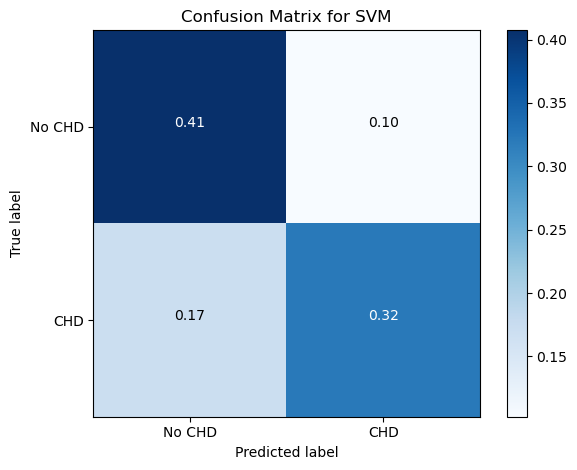

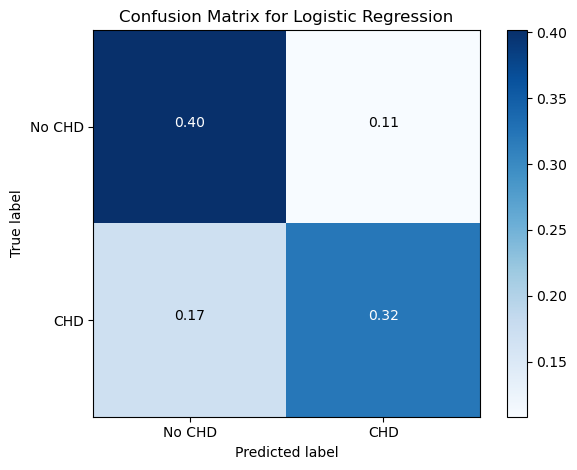

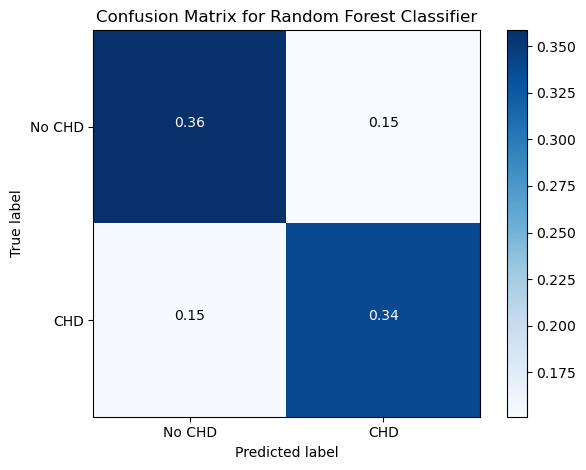

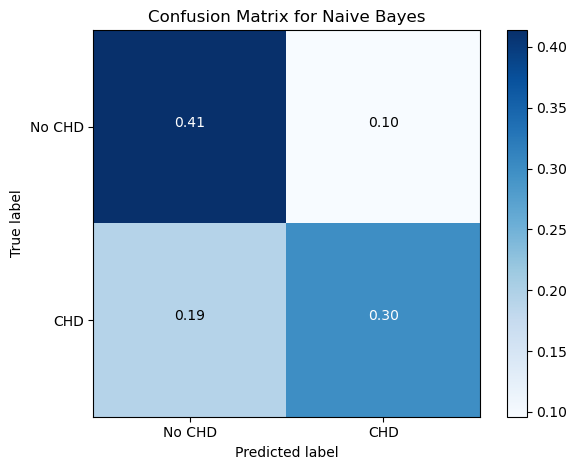

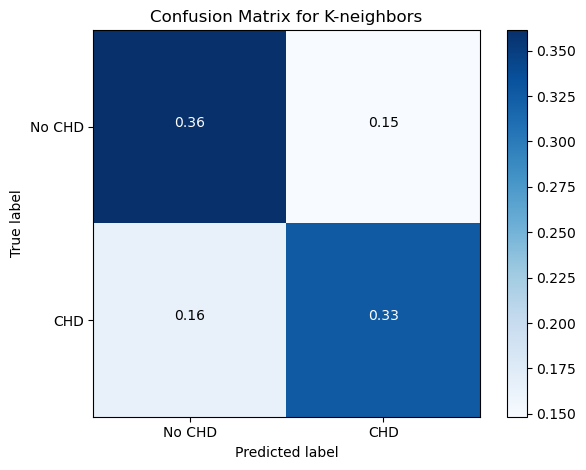

In [86]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix'):
    """
    This function prints and plots the confusion matrix.
    """
    cmap=plt.cm.Blues
    cm_norm = cm / cm.sum()
    plt.imshow(cm_norm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm_norm.max() / 2.
    for i, j in itertools.product(range(cm_norm.shape[0]), range(cm_norm.shape[1])):
        plt.text(j, i, format(cm_norm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm_norm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# create a list of models
models = [svm, lr, rfc, nb, knn]

# create a list of model names
model_names = ['SVM', 'Logistic Regression', 'Random Forest Classifier', 'Naive Bayes', 'K-neighbors']

# iterate over the models and plot the confusion matrix
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plot_confusion_matrix(cm, classes=['No CHD', 'CHD'], title='Confusion Matrix for ' + model_names[i])

plt.show()

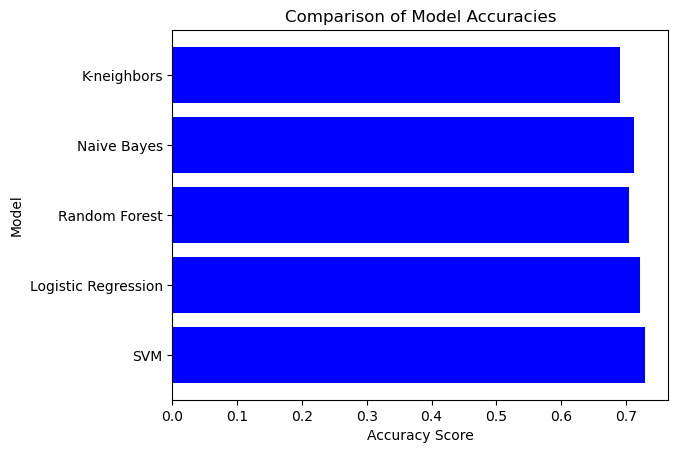

In [12]:
# create a list of model names and their corresponding accuracy scores
models = ['SVM', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'K-neighbors']
accuracy_scores = [svm_acc, lr_acc, rfc_acc, nb_acc, knn_acc]

# create a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(models, accuracy_scores, color='b')
ax.set_xlabel('Accuracy Score')
ax.set_ylabel('Model')
ax.set_title('Comparison of Model Accuracies')

plt.show()

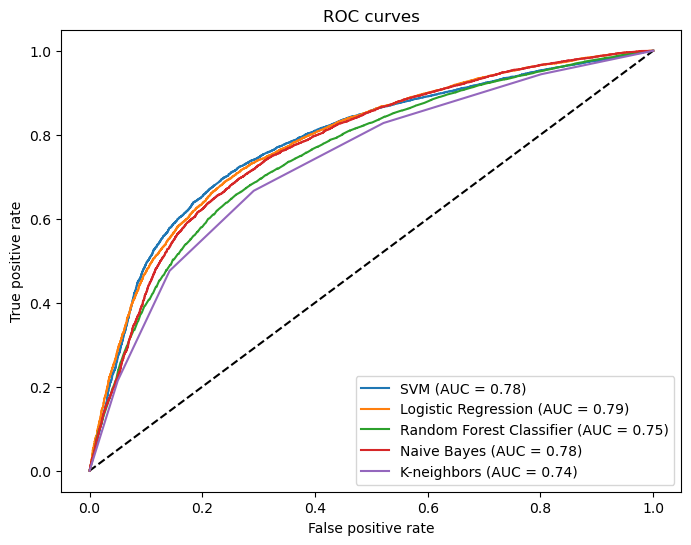

In [87]:
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(8,6))
    plt.plot([0, 1], [0, 1], 'k--')

    for name, model in models.items():
        y_pred = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=name+' (AUC = %0.2f)' % roc_auc)

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curves')
    plt.legend(loc='lower right')
    plt.show()
models = {'SVM': svm,
          'Logistic Regression': lr,
          'Random Forest Classifier': rfc,
          'Naive Bayes': nb,
          'K-neighbors': knn}

plot_roc_curves(models, X_test, y_test)

# Predicting probability of heart disease from a sample input

In [89]:
acc_dict = {"SVM": svm_acc, "Logistic Regression": lr_acc, "Random Forest Classifier": rfc_acc, "Naive Bayes": nb_acc, "K-neighbors": knn_acc}

#dictionary of probabilities
def predict_proba_all_models(sample):
    svm_proba = svm.predict_proba(sample)[0][1] 
    lr_proba = lr.predict_proba(sample)[0][1] 
    rfc_proba = rfc.predict_proba(sample)[0][1] 
    nb_proba = nb.predict_proba(sample)[0][1] 
    knn_proba = knn.predict_proba(sample)[0][1]  
    return {"SVM": svm_proba, "Logistic Regression": lr_proba, "Random Forest Classifier": rfc_proba, "Naive Bayes": nb_proba, "K-neighbors": knn_proba}

# maximum accuracy approach
def max_approach(sample):
    prob_dict = predict_proba_all_models(sample)
    max_model = "SVM"
    for model in prob_dict.keys():
        if acc_dict[model]>acc_dict[max_model] :
            max_model = model
    return prob_dict[max_model]


#weighted mean approach
def weighted_mean_approach(sample):
    prob_dict = predict_proba_all_models(sample)
    total_score = 0
    total_num = 0
    for model in prob_dict.keys():
        total_score += acc_dict[model]
        total_num += (acc_dict[model])*(prob_dict[model])
    return total_num/total_score

sample_input = []
print("Enter a sample input of 11 values for each of the attributes:")
for i in range(11):
    print(features[i], ":")
    temp = float(input())
    sample_input.append(temp)
sample = [sample_input]

#Final probability obtained from the maximum accuracy approach
print("Final probability of presence of cardiovascular disease obtained from the maximum accuracy approach:", max_approach(sample))

#Final probability obtained from the weighted mean approach
print("Final probability of presence of cardiovascular disease obtained from the weighted mean approach", weighted_mean_approach(sample))

Enter a sample input of 11 values for each of the attributes:
age :
57
gender :
1 
height :
153
weight :
87
ap_hi :
142
ap_lo :
88
cholesterol :
3
gluc :
1
smoke :
0
alco :
0
active :
1
Final probability of presence of cardiovascular disease obtained from the maximum accuracy approach: 0.6773314569475855
Final probability of presence of cardiovascular disease obtained from the weighted mean approach 0.812513246714501


# Exploring the most influential factors

[0.35391034 0.00715227 0.02791024 0.13986776 0.87312688 0.10023297
 0.32898368 0.05777866 0.04592054 0.04588519 0.09787312]
Order of influence for numeric features:
ap_hi
age
cholesterol
weight
ap_lo
gluc
height

Order of influence for binary features:
active
smoke
alco
gender


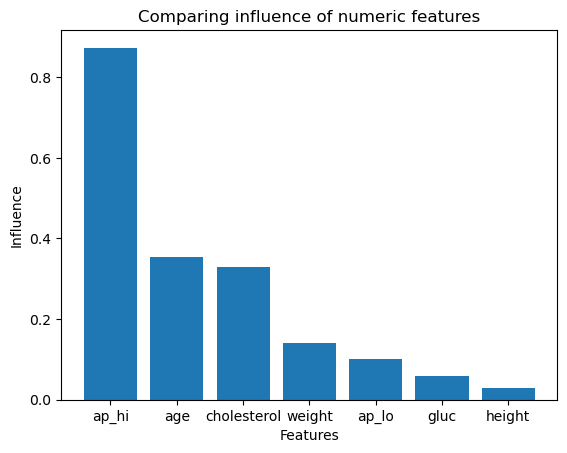

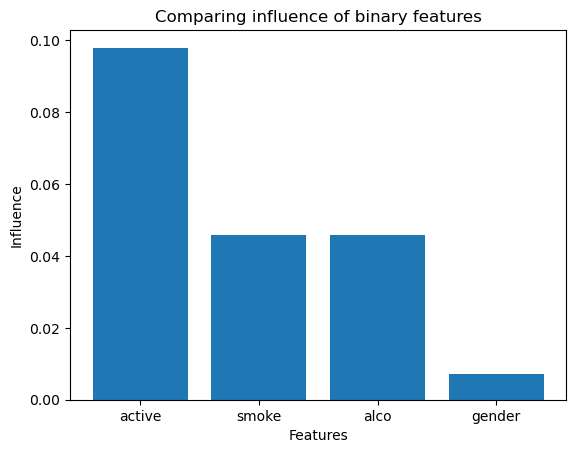

In [77]:
#to find the top most influencial factors for heart disease
def print_feature_importance(numeric_cols, binary_cols):
    coef = lr.coef_[0]
    features = list(data.columns)
    feature_importance = abs(coef)
    print(feature_importance)
    num_features = len(numeric_cols) + len(binary_cols)
    sorted_features = feature_importance.argsort()[::-1]
    sorted_sep_features = [[], []]
    sorted_sep_importance = [[],[]]
    
    print("Order of influence for numeric features:")
    for i in sorted_features:
        if i in numeric_cols:
            print(features[i])
            sorted_sep_features[0].append(features[i])
            sorted_sep_importance[0].append(feature_importance[i])
    
    print("\nOrder of influence for binary features:")
    for i in sorted_features:
        if i not in numeric_cols:
            print(features[i])
            sorted_sep_features[1].append(features[i])
            sorted_sep_importance[1].append(feature_importance[i])
    
    
        # Create bar graph
    fig, ax = plt.subplots()
    ax.bar(sorted_sep_features[0], sorted_sep_importance[0])

    # Set chart title and axis labels
    ax.set_title('Comparing influence of numeric features')
    ax.set_xlabel('Features')
    ax.set_ylabel('Influence')

        # Create bar graph
    fig, ax = plt.subplots()
    ax.bar(sorted_sep_features[1], sorted_sep_importance[1])

    # Set chart title and axis labels
    ax.set_title('Comparing influence of binary features')
    ax.set_xlabel('Features')
    ax.set_ylabel('Influence')
    # Show the graph
    plt.show()
    

numeric_cols = [0, 2, 3, 4, 5, 6, 7]
binary_cols = [1, 8, 9, 10]

print_feature_importance(numeric_cols, binary_cols)